### Importamos las librerias necesarias

In [48]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')

### Importamos el dataset

In [2]:
iris = pd.read_csv("Iris.csv")

### Borramos la columna Species por que es lo que estamos tratando de averiguar con el clustering

In [3]:
iris = iris.drop('Species', axis=1)
iris = iris.drop('Id', axis=1)

In [4]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Primero hacemos el dendograma

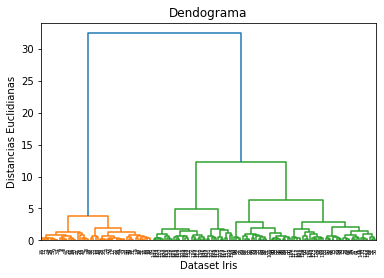

In [5]:
dendrogram = sch.dendrogram(sch.linkage(iris, method = 'ward'))

plt.title('Dendograma')
plt.xlabel('Dataset Iris')
plt.ylabel('Distancias Euclidianas')
plt.show()

### Ahora realizamos el metodo del codo para tener una mejor idea todavia de cuantos cluster son mejores

Text(0.5, 1.0, 'METODO DE CODO')

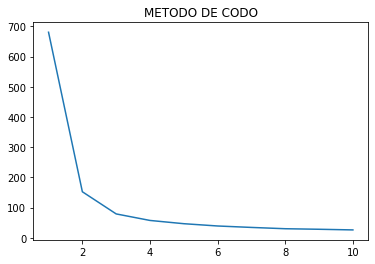

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i,max_iter=300).fit(iris)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("METODO DE CODO")

### Probamos con distinto numero de k para ver cual tiene mejor Coeficiente Silhouette

In [7]:
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(iris)
    label = kmeans.labels_
    sil_coeff = silhouette_score(iris, label, metric='euclidean')
    print("Para n_clusters={}, el coeficiente Silhouette es {}".format(n_cluster, sil_coeff))

Para n_clusters=2, el coeficiente Silhouette es 0.6808136202936815
Para n_clusters=3, el coeficiente Silhouette es 0.5525919445499755
Para n_clusters=4, el coeficiente Silhouette es 0.4978256901095468
Para n_clusters=5, el coeficiente Silhouette es 0.48851755088862725
Para n_clusters=6, el coeficiente Silhouette es 0.3682056968271304
Para n_clusters=7, el coeficiente Silhouette es 0.3560662242476374
Para n_clusters=8, el coeficiente Silhouette es 0.35360876570209027
Para n_clusters=9, el coeficiente Silhouette es 0.3447720661322127
Para n_clusters=10, el coeficiente Silhouette es 0.3157946424699592


### Entre los tres analisis anteriores podemos deducir que el mejor k para clusterizar nuestro dataset es entre 2 y 3, tomamos la desicion de hacer 3 grupos y ver como agrupa

In [16]:
k_means = KMeans(n_clusters = 3)
k_means.fit(iris)
centroids = kmeans.cluster_centers_
labels = k_means.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [23]:
centroids

array([[5.75625   , 2.775     , 4.31875   , 1.375     ],
       [5.09047619, 3.50952381, 1.54285714, 0.28571429],
       [6.61666667, 3.07916667, 5.5625    , 2.1375    ],
       [7.54      , 3.15      , 6.39      , 2.09      ],
       [5.        , 2.3       , 3.275     , 1.025     ],
       [6.02777778, 2.73333333, 5.02777778, 1.79444444],
       [6.49375   , 3.03125   , 4.63125   , 1.44375   ],
       [4.69      , 3.085     , 1.385     , 0.19      ],
       [5.51111111, 3.94444444, 1.45555556, 0.26666667],
       [5.625     , 2.54166667, 3.86666667, 1.15833333]])

### Agrego la nueva etiqueta al dataset para terminar

In [10]:
iris['Species']=labels

In [13]:
iris.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,1


### Para analizar que tan bien realizo la divicion podemos realizar varios graficos

#### Vamos separando las dimenciones de a 2 para poder graficarlas coloreandolas segun el label del cluster que obtuvimos

Text(0, 0.5, 'SepalWidthCm')

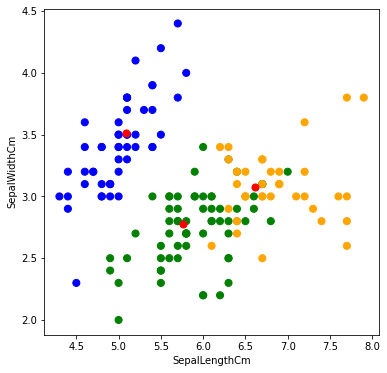

In [40]:
fig = plt.figure(figsize= (6,6))
ax = fig.add_subplot(1,1,1)
color = np.array(["blue","green","orange"])
ax.scatter(x= iris.SepalLengthCm, y=iris.SepalWidthCm, c=color[iris.Species], s=50)
ax.scatter(centroids[0:3,0],centroids[0:3,1], c='red', s=50)
ax.set_xlabel("SepalLengthCm")
ax.set_ylabel("SepalWidthCm")

Text(0, 0.5, 'PetalWidthCm')

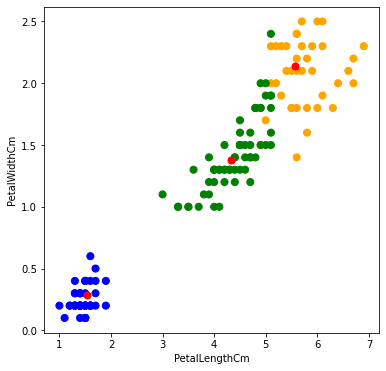

In [46]:
fig = plt.figure(figsize= (6,6))
ax = fig.add_subplot(1,1,1)
color = np.array(["blue","green","orange"])
ax.scatter(x= iris.PetalLengthCm, y=iris.PetalWidthCm, c=color[iris.Species], s=50)
ax.scatter(centroids[0:3,2],centroids[0:3,3], c='red', s=50)
ax.set_xlabel("PetalLengthCm")
ax.set_ylabel("PetalWidthCm")

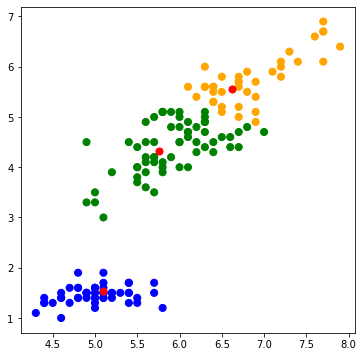

In [38]:
fig = plt.figure(figsize= (6,6))
ax = fig.add_subplot(1,1,1)
color = np.array(["blue","green","orange"])
ax.scatter(x= iris.SepalLengthCm, y=iris.PetalLengthCm, c=color[iris.Species], s=50)
ax.scatter(centroids[0:3,0],centroids[0:3,2], c='red', s=50)
ax.set_xlabel("SepalLengthCm")
ax.set_ylabel("PetalLengthCm")

Text(0, 0.5, 'PetalWidthCm')

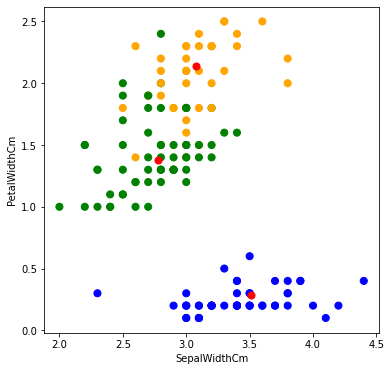

In [47]:
fig = plt.figure(figsize= (6,6))
ax = fig.add_subplot(1,1,1)
color = np.array(["blue","green","orange"])
ax.scatter(x= iris.SepalWidthCm, y=iris.PetalWidthCm, c=color[iris.Species], s=50)
ax.scatter(centroids[0:3,1],centroids[0:3,3], c='red', s=50)
ax.set_xlabel("SepalWidthCm")
ax.set_ylabel("PetalWidthCm")

#### Tambien podemos analizar de a tres dimensiones con graficos 3d

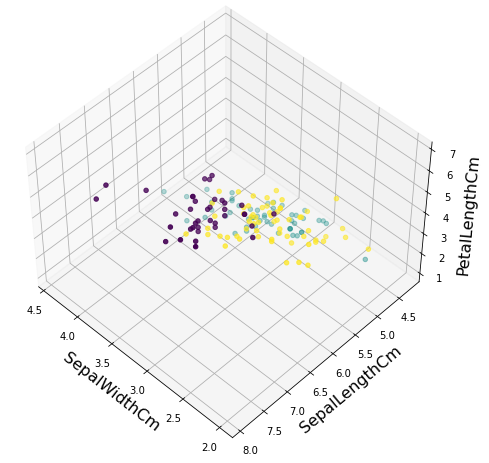

In [52]:
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
ax.set_xlabel('SepalWidthCm',fontsize=16)
ax.set_ylabel('SepalLengthCm',fontsize=16)
ax.set_zlabel('PetalLengthCm',fontsize=16)
ax.scatter(iris.SepalWidthCm, iris.SepalLengthCm, iris.PetalLengthCm, c= labels.astype(np.float))

### Para finalizar podemos comparar las especies del dataset original con los clusters que encontramos para realizar una validacion

In [54]:
iris_original = pd.read_csv("Iris.csv")

In [59]:
iris_original.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Mapeamos la columna Species con 0, 1 y 2 como los labels obtenidos para poder compararlos

In [60]:
iris_original['Species'] = iris_original['Species'].map( {'Iris-setosa': 0, 'Iris-versicolor': 1,'Iris-virginica': 2} ).astype(int)

#### Pego los resultados del cluster junto a la dimencion que queria averiguar

In [62]:
iris_original['Clusters']=iris['Species']

#### Comparo ambas dimensiones para saber que tambien hemos clasificado

In [70]:
iris_original['Comparacion']=iris_original['Species']==iris_original['Clusters']
iris_original['Comparacion'].describe()

count      150
unique       2
top       True
freq       134
Name: Comparacion, dtype: object

### De esta descripcion podemos asumir que se etiquetaron correctamente el 89.3% de los datos